# Notebook 2 - Up-scaling pyiron workflows 
Following the introduction in notebook one, the second notebook is focused on explaining how to up-scale existing simulation workflows. The tutorial is based on the molecular dynamics simulation code [LAMMPS](https://lammps.sandia.gov). Still the same protocols can also be executed with DFT codes like [VASP](https://www.vasp.at) and [S/PHI/nX](https://sxrepo.mpie.de). 

## Energy volume curve
Following the tutorial from the first day, the energy volume curve is calculated using a `for-loop` over 11 different strains. Start by importing `numpy` as well as the pyiron `Project` class and create a new project named `scaleup`. 

In [1]:
import numpy as np
from pyiron_atomistics import Project
pr = Project("scaleup")

As a first step the lattice constant is optimized for the specific lattice constant of the selected interatomic potential using [LAMMPS](https://lammps.sandia.gov). By using auto-completion (tab-completion) only the `job_name` and the element in this case iron `Fe` have to be selected manually. A cubic cell is created by adding the option `cubic=True` when creating the bulk structure:

In [2]:
job_mini = pr.create.job.Lammps(job_name="job_mini")
job_mini.structure = pr.create.structure.ase.bulk("Fe", cubic=True)

From the list of available potentials in the [NIST](https://www.ctcms.nist.gov/potentials/) and [openKIM](https://openkim.org) potential databases, one potential is selected. Depending on the project it is commonly required to carefully test multiple interatomic potentials:

In [3]:
potential = job_mini.list_potentials()[0]
potential

'1997--Ackland-G-J--Fe--LAMMPS--ipr1'

Optimise the lattice constant of the cubic simulation cell using the `calc_minimize()` function with the additional parameter `pressue=0.0`. The potential is assinged to the job object and afterwards the calculation is executed using `run()`:

In [4]:
job_mini.calc_minimize(pressure=0)
job_mini.potential = potential
job_mini.run()

The job job_mini was saved and received the ID: 1


The lattice constant is extracted from the final structure of the minimization calculation using the `get_structure()` function:  

In [5]:
alat_guess = job_mini.get_structure().cell[0,0]
np.round(alat_guess, 3)

2.866

Based on the initial guess of the lattice constant 11 strains ranging from $90$% to $110$% are applied to calculate the energy volume curve. The calculation are named based on the applied strain and the required structures are again created using the `pr.create.structure.ase.bulk()` function. All calculation are executed directly inline. 

In [6]:
for strain in np.linspace(0.9, 1.1, 11):
    job_name = "lmp_" + str(np.round(strain,2)).replace(".", "_")
    job = pr.create.job.Lammps(job_name=job_name)
    print(alat_guess * strain**(1/3))
    job.structure = pr.create.structure.ase.bulk("Fe", a=alat_guess * strain**(1/3), )
    job.potential = potential
    job.run()

2.7675753208676444
The job lmp_0_9 was saved and received the ID: 2
2.7879258702511898
The job lmp_0_92 was saved and received the ID: 3
2.8079835805272397
The job lmp_0_94 was saved and received the ID: 4
2.8277587643206537
The job lmp_0_96 was saved and received the ID: 5
2.8472611651817745
The job lmp_0_98 was saved and received the ID: 6
2.866499999891875
The job lmp_1_0 was saved and received the ID: 7
2.885483996845223
The job lmp_1_02 was saved and received the ID: 8
2.90422143094099
The job lmp_1_04 was saved and received the ID: 9
2.9227201553630375
The job lmp_1_06 was saved and received the ID: 10
2.9409876305783165
The job lmp_1_08 was saved and received the ID: 11
2.9590309508440615
The job lmp_1_1 was saved and received the ID: 12


Overview of the existing calculation in the current project using `job_table()`: 

In [7]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,Fe2,job_mini,/job_mini,None,/home/jovyan/scaleup/,2023-09-21 20:15:50.655627,2023-09-21 20:15:51.004014,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
1,2,finished,Fe,lmp_0_9,/lmp_0_9,None,/home/jovyan/scaleup/,2023-09-21 20:15:51.214681,2023-09-21 20:15:51.496450,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
2,3,finished,Fe,lmp_0_92,/lmp_0_92,None,/home/jovyan/scaleup/,2023-09-21 20:15:51.777952,2023-09-21 20:15:52.088359,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
3,4,finished,Fe,lmp_0_94,/lmp_0_94,None,/home/jovyan/scaleup/,2023-09-21 20:15:52.310469,2023-09-21 20:15:52.654013,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
4,5,finished,Fe,lmp_0_96,/lmp_0_96,None,/home/jovyan/scaleup/,2023-09-21 20:15:52.801506,2023-09-21 20:15:53.145727,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
5,6,finished,Fe,lmp_0_98,/lmp_0_98,None,/home/jovyan/scaleup/,2023-09-21 20:15:53.432473,2023-09-21 20:15:53.716218,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
6,7,finished,Fe,lmp_1_0,/lmp_1_0,None,/home/jovyan/scaleup/,2023-09-21 20:15:53.935057,2023-09-21 20:15:54.309522,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
7,8,finished,Fe,lmp_1_02,/lmp_1_02,None,/home/jovyan/scaleup/,2023-09-21 20:15:54.438401,2023-09-21 20:15:54.722728,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
8,9,finished,Fe,lmp_1_04,/lmp_1_04,None,/home/jovyan/scaleup/,2023-09-21 20:15:54.916904,2023-09-21 20:15:55.329898,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None
9,10,finished,Fe,lmp_1_06,/lmp_1_06,None,/home/jovyan/scaleup/,2023-09-21 20:15:55.460876,2023-09-21 20:15:55.823011,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,None


The simulation results are collected with a simple for loop by iterating over the jobs in the project using `iterjobs()` and appending the final volume of the calculation and the total energy to a set of lists:

In [8]:
vol_lst, eng_lst = [], []
for job in pr.iter_jobs(): 
    if "lmp_" in job.job_name:
        vol_lst.append(job["output/generic/volume"][-1])
        eng_lst.append(job["output/generic/energy_tot"][-1])

  0%|          | 0/12 [00:00<?, ?it/s]

Finally the simulation results of the results are visualised using `matplotlib` to plot the energy volume curve:

Text(0, 0.5, 'Energy')

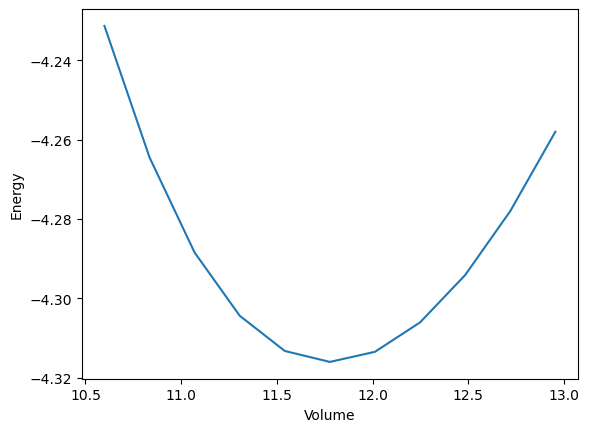

In [9]:
import matplotlib.pyplot as plt
plt.plot(vol_lst, eng_lst)
plt.xlabel("Volume")
plt.ylabel("Energy")

## Murnaghan Class
Using `for-loops` to create large datasets is limited. A more scalable approach is using already existing classes and combine those like building blocks. For the example of calculating an energy volume curve the `Murnaghan` class implements the creation of different strained structures as well as the management of the related calculation. In particular these job classes or `GenericMasters` support various modes of communication with the HPC queuing system. For example submitting individual calculation or executing all calculation in a single job either in serial or in parallel. Still for this presentation all jobs are executed inline.

As a start a template job is created which uses the same interatomic potential as the previous calculation and the same already optimised crystal structure:

In [10]:
job_fe = pr.create.job.Lammps(job_name="job_fe")
job_fe.structure = job_mini.get_structure()
job_fe.potential = potential

The same template job is used for multiple calculation in the following, therefore it is copied for the different applications using the `copy_template()` function:

In [11]:
job_murn = job_fe.copy_template(
    new_job_name="job_murn"
)

From the newly created copy a new job is created of type `Murnaghan`. By creating the job from the previous job template the relation of the job and it is location on the filesystem is defined. The input of the `Murnaghan` class can again be edited using the edge notation:

In [12]:
murn = job_murn.create_job(
    job_type=pr.job_type.Murnaghan, 
    job_name="murn"
)
murn.input 

,Parameter,Value,Comment
0,num_points,11,number of sample points
1,fit_type,polynomial,"['polynomial', 'birch', 'birchmurnaghan', 'murnaghan', 'pouriertarantola', 'vinet']"
2,fit_order,3,order of the fit polynom
3,vol_range,0.1,relative volume variation around volume defined by ref_ham
4,axes,"[x, y, z]",Axes along which the strain will be applied
5,strains,None,List of strains that should be calculated. If given vol_range and num_points take no effect.
6,allow_aborted,0,"The number of child jobs that are allowed to abort, before the whole job is considered aborted."


When the run method of the `Murnaghan` class is called, the individual calculation are started and after the successful completion the aggregated information is stored in the `Murnaghan` object:

In [13]:
murn.run()

The job murn was saved and received the ID: 13
The job murn_0_9 was saved and received the ID: 14
The job murn_0_92 was saved and received the ID: 15
The job murn_0_94 was saved and received the ID: 16
The job murn_0_96 was saved and received the ID: 17
The job murn_0_98 was saved and received the ID: 18
The job murn_1_0 was saved and received the ID: 19
The job murn_1_02 was saved and received the ID: 20
The job murn_1_04 was saved and received the ID: 21
The job murn_1_06 was saved and received the ID: 22
The job murn_1_08 was saved and received the ID: 23
The job murn_1_1 was saved and received the ID: 24


In addition to the data aggregation methods the `Murnaghan` class also provides plotting methods for commonly used plots: 

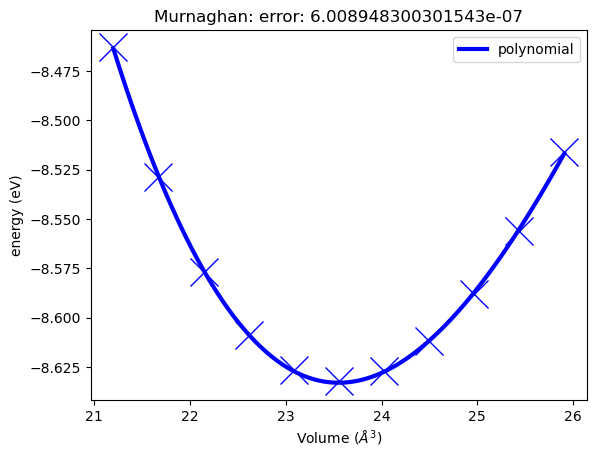

<Axes: title={'center': 'Murnaghan: error: 6.008948300301543e-07'}, xlabel='Volume ($\\AA^3$)', ylabel='energy (eV)'>

In [14]:
murn.plot()

## Phonopy interface 
Following the same principles also the `Phonopy` interface is implemented in pyiron. This enables using `Phonopy` in combination with all simulation codes implemented in pyiron. The required steps are more or less identical. Again starting by copying the job template using the `copy_template()` function. Starting with a bulk calculation as a reference:

In [15]:
job_bulk = job_fe.copy_template(
    new_job_name="job_bulk"
)
job_bulk.run()

The job job_bulk was saved and received the ID: 25


Following the bluk calculation the `Phonopy` job is created by again copying the job template and creating a `Phonopy` job from the job object:

In [16]:
job_phono = job_fe.copy_template(
    new_job_name="job_phono"
)

Again the input object of the `Phonopy` job provides access to the most commonly used input parameters: 

In [17]:
phono = job_phono.create_job(
    job_type=pr.job_type.PhonopyJob, 
    job_name="phono"
)
phono.input 

,Parameter,Value,Comment
0,interaction_range,10.000000,"Minimal size of supercell, Ang"
1,factor,15.633302,Frequency unit conversion factor (default for VASP)
2,displacement,0.010000,"atoms displacement, Ang"
3,dos_mesh,20.000000,mesh size for DOS calculation
4,primitive_matrix,NaN,
5,number_of_snapshots,NaN,"int or None, optional. Number of snapshots of supercells with random displacements. Random displacements are generated displacing all atoms in random directions with a fixed displacement distance ..."


Once more the job is executed using the `run()` function:

In [18]:
phono.run()

The job phono was saved and received the ID: 26
The job job_phono_0 was saved and received the ID: 27


And the density of states can be plotted directly from the `Phonopy` job object:

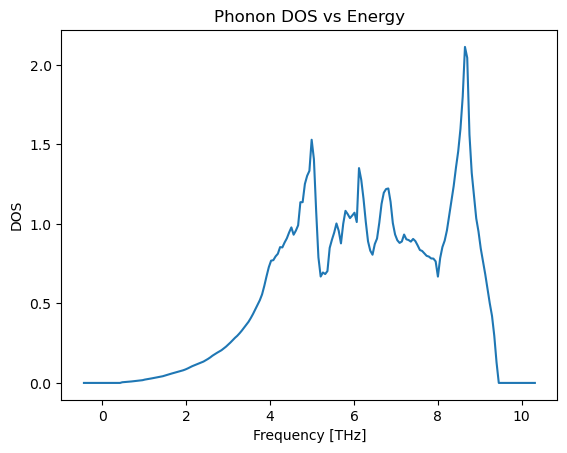

In [19]:
phono.plot_dos()

## Harmonic approximation
In addition to the calculation of the density of states `Phonopy` also enables the calculation of the free energy with the harmonic and quasi-harmonic approximation. Starting with the harmonic approximation, the free energy is calculated for temperatures ranging from $0$K to $800$K:

In [20]:
temperatures = np.linspace(0, 800, 41)
bulk_thermal_properties = phono.get_thermal_properties(temperatures=temperatures)

The free energy over temperature is plotted by combining the vibrational and the bulk energy:

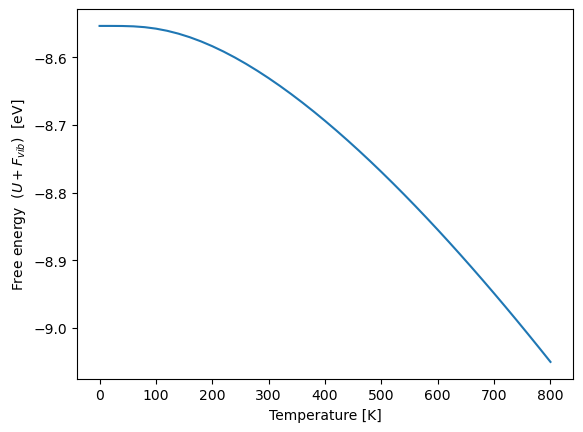

In [21]:
plt.plot(temperatures, job_bulk.output.energy_pot[-1] + bulk_thermal_properties.free_energies)
plt.xlabel("Temperature [K]")
plt.ylabel("Free energy  ($U+F_{vib}$)  [eV]");

## Quasi-harmonic approximation
The major advantage of the `GenericMaster` classes is that they can not only be used to combine regular calculation, but also `GenericMaster` classes themselves. Like building blocks the different pyiron classes can be combined and nested. For the quasi-harmonic approximation the volume dependent free energy is calculated and the optimal volume for a given temperature is identifed by fitting. Starting once more by copying the template job using the `copy_template()` function: 

In [22]:
job_strain = job_fe.copy_template(
    new_job_name="job_strain"
)

Aftewards the same template job is used to create both a `Murnaghan` job and a `Phonopy` job:

In [23]:
murn_strain = job_strain.create_job(
    job_type=pr.job_type.Murnaghan,
    job_name="murn_strain"
)
phono_strain = job_strain.create_job(
    job_type=pr.job_type.PhonopyJob,
    job_name="phono_strain"
)

The `Phonopy` job is then used to create a `QuasiHarmonicJob` which calculates the free energy for each of the different volumes:

In [24]:
quasi_strain = phono_strain.create_job(
    job_type=pr.job_type.QuasiHarmonicJob,
    job_name="quasi_strain"
)

The input of the `QuasiHarmonicJob` is adjusted to range the temperature up to $800$K using $41$ steps:

In [25]:
quasi_strain.input["temperature_end"] = 800
quasi_strain.input["temperature_steps"] = 41

After all calculation are setup they can be executed by again calling the `run()` commands on both the `Murnaghan` job and the `QuasiHarmonicJob` job:

In [26]:
murn_strain.run()
quasi_strain.run()

The job murn_strain was saved and received the ID: 28
The job murn_strain_0_9 was saved and received the ID: 29
The job murn_strain_0_92 was saved and received the ID: 30
The job murn_strain_0_94 was saved and received the ID: 31
The job murn_strain_0_96 was saved and received the ID: 32
The job murn_strain_0_98 was saved and received the ID: 33
The job murn_strain_1_0 was saved and received the ID: 34
The job murn_strain_1_02 was saved and received the ID: 35
The job murn_strain_1_04 was saved and received the ID: 36
The job murn_strain_1_06 was saved and received the ID: 37
The job murn_strain_1_08 was saved and received the ID: 38
The job murn_strain_1_1 was saved and received the ID: 39
The job quasi_strain was saved and received the ID: 40
The job quasi_strain_0_9 was saved and received the ID: 41
The job job_strain_0 was saved and received the ID: 42
The job quasi_strain_0_92 was saved and received the ID: 43
The job job_strain_0 was saved and received the ID: 44
The job quasi_st

After the successful completion of all calculation the results can be visualised using `matplotlib` starting by creating a color map:

In [27]:
import matplotlib
cmap = matplotlib.cm.get_cmap('coolwarm')

/tmp/ipykernel_1147/963602884.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('coolwarm')


The free energy is plotted over volume and temperature, starting at a low temperature of $0$K up to the $800$K:

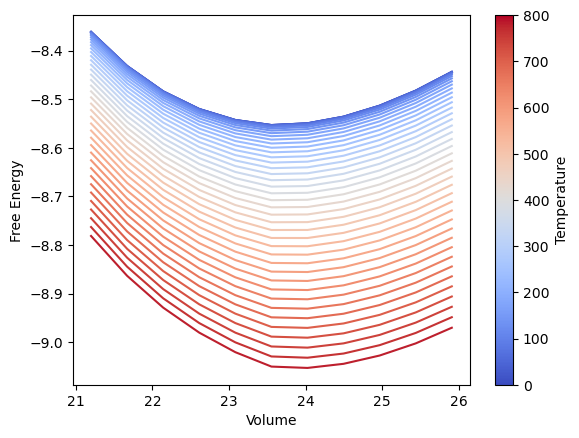

In [28]:
# Iterate over the the output of the QuasiHarmonicJob to plot the temperature dependent free energy over volume 
fig, ax = plt.subplots()
for i, [t, free_energy, v] in enumerate(
        zip(quasi_strain["output/temperatures"].T, 
            quasi_strain["output/free_energy"].T, 
            quasi_strain["output/volumes"].T)):
    color = cmap(i/len(quasi_strain["output/temperatures"].T))
    # Add the energy of the Murnaghan Job to the vibrational free energy
    ax.plot(v, free_energy + murn_strain["output/energy"], color=color)

# Add labels to the plot     
ax.set_xlabel("Volume")
ax.set_ylabel("Free Energy")

# Add a color bar to visualise the temperature dependence 
temperatures = quasi_strain["output/temperatures"]
normalize = matplotlib.colors.Normalize(vmin=temperatures.min(), vmax=temperatures.max())
scalarmappaple = matplotlib.cm.ScalarMappable(norm=normalize, cmap=cmap)
scalarmappaple.set_array(temperatures)
cbar = plt.colorbar(scalarmappaple, ax=ax)
cbar.set_label("Temperature")

In addition to the free energy over temperature and volume, the optimised volume over temperature allows to quantify the volume expansion:

In [29]:
# Use the optimise_volume() function of the QuasiHarmonicJob  
v0_lst, free_eng_lst, entropy_lst, cv_lst = quasi_strain.optimise_volume(
    # It requires the output energy of the energy volume curve as additional input 
    bulk_eng=murn_strain["output/energy"]
)
temperature_output_lst = quasi_strain["output/temperatures"][0]

Text(0, 0.5, 'Volume')

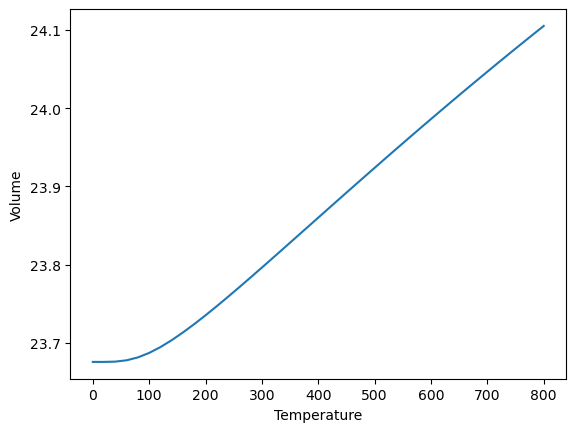

In [30]:
plt.plot(temperature_output_lst, v0_lst)
plt.xlabel("Temperature")
plt.ylabel("Volume")

Finally based on the volume expansion over temperature the quasi-harmonic free energy is calculated: 

Text(0, 0.5, 'Free Energy')

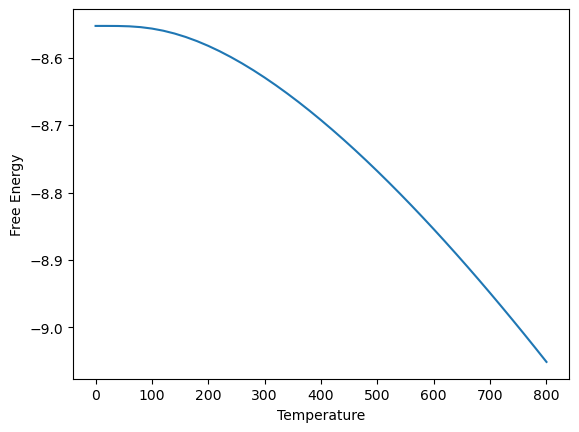

In [31]:
plt.plot(temperature_output_lst, free_eng_lst)
plt.xlabel("Temperature")
plt.ylabel("Free Energy")

This example demonstrates how pyiron can be used to calculate free energies. 

## Scriptjob
From a more technical perspective the `GenericMaster` classes are only one kind of tool integrated in pyiron to up-scale existing simulation protocols. While they provide a lot of flexibility like nesting multiple levels of `GenericMaster` objects, the development of `GenericMaster` classes requires a general understanding of pyiron. A more flexible way to up-scale an existing workflow is using `Scriptjob` objects which can execute existing python scripts and also existing jupyter notebooks. So once a new simulation workflow is implemented in a jupyter notebook this jupyter notebook can be used as an input for a `Scriptjob` to loop over a control parameter like looping over existing interatomic potentials. In this example we create a simple `Scriptjob` which just contains a python script:

In [32]:
python_script = """\
from pyiron import Project
pr = Project("script")
job = pr.create.job.Lammps("lmp")
job.structure = pr.create.structure.ase.bulk("Fe")
job.run()
"""

The python script which creates a single LAMMPS calculation is written to a python file named `script.py`. 

In [33]:
with open("script.py", "w") as f:
    f.writelines(python_script)

Afterwards a `ScriptJob` object is created from the project object and the python file `script.py` is attached as `script_path` before the job is executed using the `run()` function. Again the `ScriptJob` object behaves like any other job object in pyiron:

In [34]:
job_script = pr.create.job.ScriptJob("script")
job_script.script_path = "script.py"
job_script.run()

The job script was saved and received the ID: 63


  0%|          | 0/18 [00:00<?, ?it/s]

By looking at the job table it is visible that not only the `ScriptJob` itself but also the job executed from the python script named `lmp` is listed in the project:

In [35]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,Fe2,job_mini,/job_mini,None,/home/jovyan/scaleup/,2023-09-21 20:15:50.655627,2023-09-21 20:15:51.004014,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,NaN
1,2,finished,Fe,lmp_0_9,/lmp_0_9,None,/home/jovyan/scaleup/,2023-09-21 20:15:51.214681,2023-09-21 20:15:51.496450,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,NaN
2,3,finished,Fe,lmp_0_92,/lmp_0_92,None,/home/jovyan/scaleup/,2023-09-21 20:15:51.777952,2023-09-21 20:15:52.088359,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,NaN
3,4,finished,Fe,lmp_0_94,/lmp_0_94,None,/home/jovyan/scaleup/,2023-09-21 20:15:52.310469,2023-09-21 20:15:52.654013,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,NaN
4,5,finished,Fe,lmp_0_96,/lmp_0_96,None,/home/jovyan/scaleup/,2023-09-21 20:15:52.801506,2023-09-21 20:15:53.145727,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,finished,Fe128,job_strain_0,/job_strain_0,None,/home/jovyan/scaleup/quasi_strain_hdf5/quasi_strain_1_08_hdf5/,2023-09-21 20:16:54.767482,2023-09-21 20:16:55.167649,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,59.0
60,61,finished,Fe2,quasi_strain_1_1,/quasi_strain_1_1,None,/home/jovyan/scaleup/quasi_strain_hdf5/,2023-09-21 20:16:56.300155,2023-09-21 20:16:58.838264,2.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1#1/1,PhonopyJob,0.0.1,None,40.0
61,62,finished,Fe128,job_strain_0,/job_strain_0,None,/home/jovyan/scaleup/quasi_strain_hdf5/quasi_strain_1_1_hdf5/,2023-09-21 20:16:57.823865,2023-09-21 20:16:58.325476,0.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Lammps,0.1,None,61.0
62,63,finished,None,script,/script,None,/home/jovyan/scaleup/,2023-09-21 20:17:02.708001,2023-09-21 20:17:10.933719,8.0,pyiron@jupyter-pyiron-2dsusmet-2drdm-2dworkshop-2dxewkt7st#1,Script,0.1,None,NaN


Therefore while offering less flexibility the `ScriptJob` class is a simple way to create reusable snippets if certain parts of a simulation protocol are commonly repeated in different projects. 

## Runtime communication
The third way to accelerate existing simulation protocols in pyiron is by using the so-called interactive mode. This interactive mode is enabled by simply setting the flag `job.server.run_mode.interactive = True` and it enables communication with serial and parallel simulation codes during run time by leveraging various communication interfaces. For example: 
* LAMMPS is available as Python library so in process communication is easy. 
* VASP provides interactive communication via standard input and output in combination with the `INTERACTIVE` tag set in the `INCAR` file which is unfortunatley not officially documented. 
* S/PHI/nX uses unix pipes to communicate with python during run time. 

pyiron implements a generic interface for these different communication standards, compareable to [ipi-code](http://ipi-code.org) and again enables the user to interact with the codes interactively by keeping the simulation code running in the background. In combination with the `Murnaghan` job a single `LAMMPS` calculation can be used as quantum engine to evaluate 11 different strains. 

The job murn_int was saved and received the ID: 65
The job murn_int_job_murn_int was saved and received the ID: 66


/srv/conda/envs/notebook/lib/python3.11/site-packages/pyiron_atomistics/lammps/interactive.py:502: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/pyiron_atomistics/lammps/interactive.py:131: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


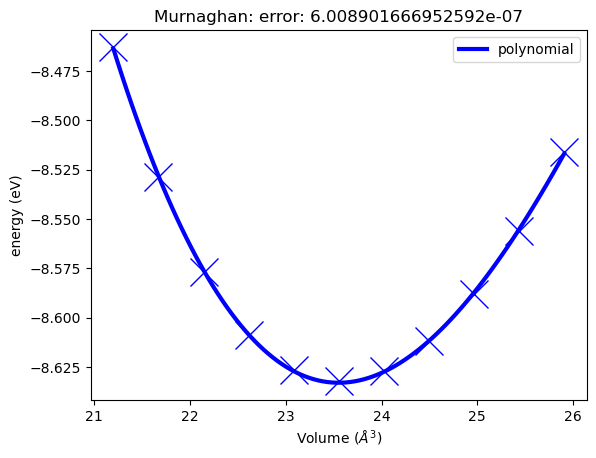

<Axes: title={'center': 'Murnaghan: error: 6.008901666952592e-07'}, xlabel='Volume ($\\AA^3$)', ylabel='energy (eV)'>

In [36]:
job_murn = job_fe.copy_template(
    new_job_name="job_murn_int"
)
job_murn.server.run_mode.interactive = True
murn = job_murn.create_job(
    job_type=pr.job_type.Murnaghan, 
    job_name="murn_int"
)
murn.run()
murn.plot()

## Summary 
After the general introduction to pyiron in the first notebook the second notebook introduced multiple methods to up-scale existing simulation protocols: 
* Starting with `GenericMaster` classes which can be combined like building blocks. 
* Followed by the `ScriptJob` class which enables the easy reuse of existing simulation protocols. 
* Finally the interactive mode was briefly introduced as a way to accelerate calculation by keeping the simulation code running during the execution. 

Additional exercises: 
* Extend the evaluation of interatomic potentials from the first day by comparing the density of states for different interatomic potentials. How does the sensitivity of bulk properties like the bulk modulus compare to the sensitivity of the free energy of different interatomic potentials? 
* Write a `ScriptJob` for a Murnaghan calculation, by using the `script_job.input` to set the input for the `ScriptJob` and then inside the `ScriptJob` use `pr.get_external_input()` to retrieve the input. 
* Implement a simple MonteCarlo algorithm for LAMMPS by changing the atom species of the `job.structure` object and calling `job.run()` after each change to evaluate the structure in interactive mode. By setting `job.interactive_enforce_structure_reset = True` the structure is always reset for each step, while the flag is typically set to false for applications like calculating molecular dynamics trajectories or thermodynamic integration. 